# PS 88 - Week 12 - Class Demonstrations

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
%matplotlib inline

Here is code to produce oru simple two-person two-time period example. In the first period ("before"), neither watch Fox news, and in the second period ("after"), Sam starts watching Fox, but Carlos does not. 

In [2]:
names = ["Sam", "Sam", "Carlos", "Carlos"]
time = ["Before", "After", "Before", "After"]
fox = [0,1,0,0]
cons = [5,8,3,4]
fox2 = pd.DataFrame({'Name': names, "Time": time, "Fox":fox, "Cons":cons})
fox2

,Name,Time,Fox,Cons
0,Sam,Before,0,5
1,Sam,After,1,8
2,Carlos,Before,0,3
3,Carlos,After,0,4


Plotting the trends

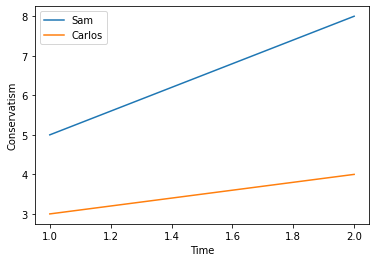

In [3]:
plt.plot([1,2],fox2.Cons[fox2['Name']=='Sam'], label="Sam")
plt.plot([1,2],fox2.Cons[fox2['Name']=='Carlos'], label="Carlos")
plt.xlabel('Time')
plt.ylabel('Conservatism')
plt.legend()

Adding the difference in the "after" time, when Sam is watching Fox and Carlos is not.

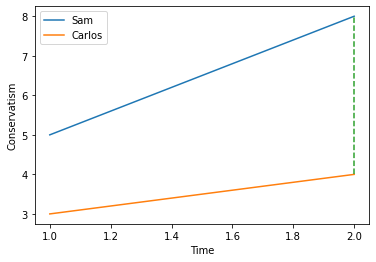

In [4]:
plt.plot([1,2],fox2.Cons[fox2['Name']=='Sam'], label="Sam")
plt.plot([1,2],fox2.Cons[fox2['Name']=='Carlos'], label="Carlos")
plt.xlabel('Time')
plt.ylabel('Conservatism')
plt.plot([2,2],[4,8], linestyle="--")
plt.legend()

... Comparing this to the difference in the before time, when neither watches Fox.

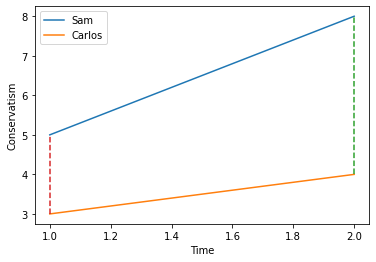

In [5]:
plt.plot([1,2],fox2.Cons[fox2['Name']=='Sam'], label="Sam")
plt.plot([1,2],fox2.Cons[fox2['Name']=='Carlos'], label="Carlos")
plt.xlabel('Time')
plt.ylabel('Conservatism')
plt.plot([2,2],[4,8], linestyle="--")
plt.plot([1,1],[3,5], linestyle="--")
plt.legend()

What would the "Counterfactual Sam" think if he followed a similar trend as Carlos?

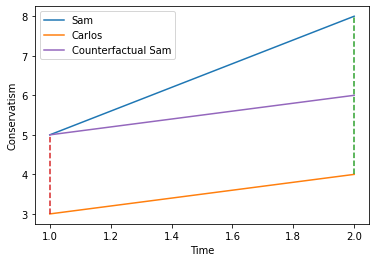

In [6]:
plt.plot([1,2],fox2.Cons[fox2['Name']=='Sam'], label="Sam")
plt.plot([1,2],fox2.Cons[fox2['Name']=='Carlos'], label="Carlos")
plt.plot([2,2],[4,8], linestyle="--")
plt.plot([1,1],[3,5], linestyle="--")
plt.plot([1,2],[5,6], label="Counterfactual Sam")
plt.xlabel('Time')
plt.ylabel('Conservatism')
plt.legend()

The difference between Sam and Counterfactual Same is our "difference in difference" estimate.

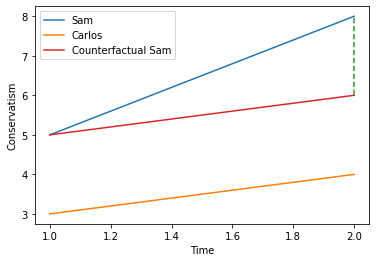

In [7]:
plt.plot([1,2],fox2.Cons[fox2['Name']=='Sam'], label="Sam")
plt.plot([1,2],fox2.Cons[fox2['Name']=='Carlos'], label="Carlos")
plt.plot([2,2],[6,8], linestyle="--")
plt.plot([1,2],[5,6], label="Counterfactual Sam")
plt.xlabel('Time')
plt.ylabel('Conservatism')
plt.legend()

We can also estimate this with a regression (though it gets mad because we don't have enough data to compute standard errors.)

In [8]:
fox2['Sam'] = 1*(fox2['Name']=="Sam")
fox2['After'] = 1*(fox2['Time']=="After")                 
smf.ols("Cons ~ Sam + After + Fox", data=fox2).fit().summary()

/opt/conda/lib/python3.9/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
/opt/conda/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1728: RuntimeWarning: divide by zero encountered in true_divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/opt/conda/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1728: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/opt/conda/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1650: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Cons   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Thu, 18 Nov 2021   Prob (F-statistic):                nan
Time:                        13:08:57   Log-Likelihood:                 127.38
No. Observations:                   4   AIC:                            -246.8
Df Residuals:                       0   BIC:                            -249.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.0000        inf          0        nan         nan         nan
Sam            2.0000        inf          0        nan         nan         nan
After          1.0000        inf          0        nan         nan         nan
Fox            2.0000        inf          0        nan         nan         nan
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   0.446
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.348
Skew:                          -0.435   Prob(JB):                        0.840
Kurtosis:                       1.846   Cond. No.                         6.85
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Let's see what things look like with a few more periods.

In [9]:
samdata = pd.DataFrame({"Name":["Sam","Sam","Sam","Sam","Sam","Sam"],
                        "Time":[1,2,3,4,5,6],
                        "Fox": [0,0,0,1,1,1],
                       "Cons":[4,4,5,8,8,7]})
carlosdata = pd.DataFrame({"Name":["Carlos","Carlos","Carlos","Carlos","Carlos","Carlos"],
                           "Time":[1,2,3,4,5,6],
                        "Fox": [0,0,0,0,0,0],
                       "Cons":[2,3,3,4,3,3]})

Plotting both:

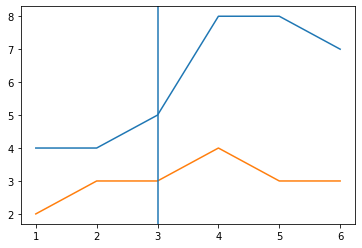

In [10]:
plt.plot(samdata['Time'],samdata['Cons'], label="Sam")
plt.plot(carlosdata['Time'],carlosdata['Cons'], label="Carlos")
plt.axvline(3)

To run a regression we need to combine the two dataframes. We can do that with the `pd.concat` function.

In [11]:
alldata = pd.concat([samdata, carlosdata])
alldata

,Name,Time,Fox,Cons
0,Sam,1,0,4
1,Sam,2,0,4
2,Sam,3,0,5
3,Sam,4,1,8
4,Sam,5,1,8
5,Sam,6,1,7
0,Carlos,1,0,2
1,Carlos,2,0,3
2,Carlos,3,0,3
3,Carlos,4,0,4


To create time period fixed effects, we can careate a new variable that is converted to a string with `.astype(srt)`

In [12]:
alldata['Time_n'] = alldata['Time'].astype(str)
alldata

,Name,Time,Fox,Cons,Time_n
0,Sam,1,0,4,1
1,Sam,2,0,4,2
2,Sam,3,0,5,3
3,Sam,4,1,8,4
4,Sam,5,1,8,5
5,Sam,6,1,7,6
0,Carlos,1,0,2,1
1,Carlos,2,0,3,2
2,Carlos,3,0,3,3
3,Carlos,4,0,4,4


Compting the change in Sam's average conservatism before and after watching Fox.

Note we are using a new way to refer to columns of a data frame. If "Var" is a column name in df, we can refer to it with df.Var. 

In [13]:
diffsam = np.mean(samdata.Cons[samdata['Time'] > 3]) - np.mean(samdata.Cons[samdata['Time'] <= 3])
diffsam

3.333333333333334

Now taking the change in averagace conservatism in Carlos, from time after *Sam* starting watching Fox to before.

In [14]:
diffcarlos = np.mean(carlosdata.Cons[carlosdata['Time'] > 3]) - np.mean(carlosdata.Cons[carlosdata['Time'] <= 3])
diffcarlos

0.666666666666667

The difference in differences is then:

In [15]:
diffsam - diffcarlos

2.666666666666667

To get this in regression form, we use `Cons` as the depenent variable in a regression taht includes watching Fox as an independent variable, along with the person and time fixed effects.

In [16]:
smf.ols("Cons ~ Fox + Name + Time_n", data=alldata).fit().summary()

/opt/conda/lib/python3.9/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Cons   R-squared:                       0.986
Model:                            OLS   Adj. R-squared:                  0.961
Method:                 Least Squares   F-statistic:                     39.71
Date:                Thu, 18 Nov 2021   Prob (F-statistic):            0.00155
Time:                        13:09:48   Log-Likelihood:                0.31497
No. Observations:                  12   AIC:                             15.37
Df Residuals:                       4   BIC:                             19.25
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       2.1667      0.333      6.500      0.003       1.241       3.092
Name[T.Sam]     1.6667      0.333      5.000      0.007       0.741       2.592
Time_n[T.2]     0.5000      0.408      1.225      0.288      -0.633       1.633
Time_n[T.3]     1.0000      0.408      2.449      0.070      -0.133       2.133
Time_n[T.4]     1.6667      0.471      3.536      0.024       0.358       2.975
Time_n[T.5]     1.1667      0.471      2.475      0.069      -0.142       2.475
Time_n[T.6]     0.6667      0.471      1.414      0.230      -0.642       1.975
Fox             2.6667      0.471      5.657      0.005       1.358       3.975
==============================================================================
Omnibus:                        3.659   Durbin-Watson:                   3.333
Prob(Omnibus):                  0.160   Jarque-Bera (JB):                1.125
Skew:                          -0.000   Prob(JB):                        0.570
Kurtosis:                       1.500   Cond. No.                         9.35
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The coefficient on Fox is 2.33, equal to the differences in differences estimate!